# Regression test with previously published work

CZTS has been chosen for regression tests as this allows direct comparison between thermopot and the repository it has been extended from (CZTS-thermodynamic-model: https://github.com/WMD-group/CZTS-model\). This repository was used to generate the results published in https://doi.org/10.1039/C4TA00892H.

To perform the regression tests we first need to do some unit conversions.

In [8]:
from scripts.conversions import convert_phonopy_filetypes

convert_phonopy_filetypes("./data/Cu.dat","./data/Cu_out.dat")
convert_phonopy_filetypes("./data/Sn.dat","./data/Sn_out.dat")
convert_phonopy_filetypes("./data/S.dat","./data/S_out.dat")
convert_phonopy_filetypes("./data/Zn.dat","./data/Zn_out.dat")
convert_phonopy_filetypes("./data/CZTS.dat","./data/CZTS_out.dat")

,T,F,S,Cv,U
0,0.000,28.800946,0.000000,0.000000,28.800946
1,9.950,28.800544,0.000016,0.686957,28.802344
2,19.900,28.789421,0.000242,10.042531,28.845211
3,29.851,28.729200,0.000856,26.515069,29.025869
4,39.801,28.582873,0.001702,42.046820,29.368891
...,...,...,...,...,...
197,1960.199,-819.647445,0.053268,199.087644,392.054275
198,1970.149,-825.803234,0.053355,199.092263,394.035270
199,1980.100,-831.969029,0.053442,199.096813,396.016312
200,1990.050,-838.144779,0.053528,199.101294,397.997398


In [1]:
from thermopot import calculations, materials, reactions
import numpy as np

## 2Cu+Zn+Sn+4S <-> Cu2ZnSnS4

The published value is -3.83 eV per formula unit (-369.1 kJ per mole) at 298.15K and 1 bar.

In [2]:
CZTS_calc = calculations.Calculation(energy=-0.353240291658938E+06,xc="pbesol",NAtoms=8,volume=155.433224529)
Cu_calc = calculations.Calculation(energy=-180838.168712673,xc="pbesol",NAtoms=4,volume=45.2576997892)
Zn_calc = calculations.Calculation(energy=-0.981596036898606e05,xc="pbesol",NAtoms=2,volume=28.2580218348)
Sn_calc = calculations.Calculation(energy=-0.340581412216286E+06,xc="pbesol",NAtoms=2,volume=53.538071915)
S_calc = calculations.Calculation(energy=-0.347575504588933e06,xc="pbesol",NAtoms=32,volume=832.91786077871541)

In [3]:
CZTS = materials.Solid("CZTS",{"Cu":2,"Zn": 1,"Sn":1,"S":4},"../tests/regression/data/CZTS_out.dat",calculation=CZTS_calc)
Cu = materials.Solid("Cu",{"Cu":1},"../tests/regression/data/Cu_out.dat",calculation=Cu_calc)
Zn = materials.Solid("Zn",{"Zn":1},"../tests/regression/data/Zn_out.dat",calculation=Zn_calc)
Sn = materials.Solid("Sn",{"Sn":1},"../tests/regression/data/Sn_out.dat",calculation=Sn_calc)
S = materials.Solid("S",{"S":1},"../tests/regression/data/S_out.dat",calculation=S_calc)


In [4]:
bulk_reaction = reactions.Reaction({Cu:2,Zn:1,Sn:1,S:4},{CZTS:1})
bulk_reaction.DU().potential

-3.760958451020997

In [5]:
bulk_reaction.DH().potential

-3.760958451020997

In [8]:
bulk_reaction.Dmu().potential

3.31673343432711e-05
2.161230641091878e-05
2.3568422118631406e-05
0.00029342668360822586
6.7003410638523e-05


-3.760949602117762

In [9]:
T = np.linspace(100,1500,5) # K
P = np.array( np.logspace(1,7,5),ndmin=2).transpose() # Pa

bulk_reaction = reactions.Reaction({Cu:2,Zn:1,Sn:1,S:4},{CZTS:1},temperature=T,pressure=P)

[3.22365329e-06 6.58656214e-05 1.57410316e-04 2.63234016e-04
 3.78739356e-04]
[2.91178569e-06 4.06808931e-05 9.26445150e-05 1.51707117e-04
 2.15604141e-04]
[3.55812747e-06 4.36368746e-05 9.79031233e-05 1.59267596e-04
 2.25466257e-04]
[4.29910177e-05 5.62942533e-04 1.31659601e-03 2.18573730e-03
 3.13285182e-03]
[7.74902673e-06 1.32051296e-04 3.14713156e-04 5.26051463e-04
 7.56815834e-04]


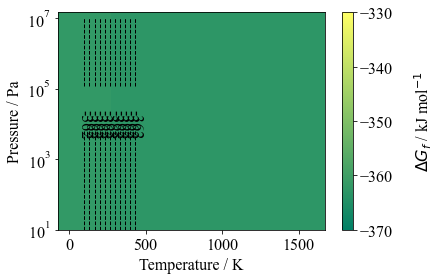

In [10]:
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-370,-330])

## 2Cu+Zn+Sn+2S2 <-> Cu2ZnSnS4


In [17]:
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../tests/regression/data/S2.dat",energies={"pbesol":-0.217220682510473e05},zpe_pbesol=0.04421415)
S2_reaction = reactions.Reaction({Cu:2,Zn:1,Sn:1,S2:2},{CZTS:1},temperature=T,pressure=P)

In [18]:
GFE = S2_reaction.Dmu(units="kJ")

[ 0.00338505 -0.66497661]
[0.00101122 0.03639944]
[ 0.00189982 -0.34018699]
[0.00051064 0.01011568]
[ 0.0019762  -0.34030726]
[0.00051082 0.00984246]
[ 0.00676343 -1.33035384]
[0.00200902 0.09667202]


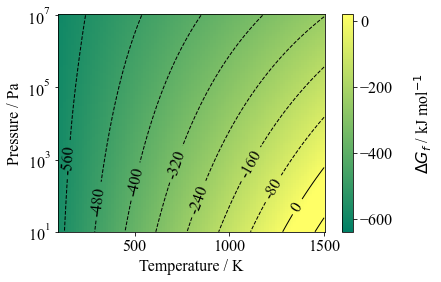

In [19]:
GFE.plot_TvsP(scale_range=[-640,20])